<div class="alert alert-block alert-info" style="background-color: #301E40; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<br/><br/>
<h1 style="font-size: 45px; color: white; align: center;"><center>
<img src="https://raw.githubusercontent.com/HumbleData/beginners-data-workshop/master/media/humble-data-logo-white-transparent.png" width="250px" /><br/><br/>
Data visualization with matplotlib
</center></h1>
</div>

![](https://matplotlib.org/_static/logo2_compressed.svg)

<div class="alert alert-block alert-warning" style="padding: 0px; padding-left: 20px; padding-top: 5px;"><h2 style="color: #301E40">
Import pyplot in matplotlib (and pandas)
</h2><br>
</div>

According to the [official documentation](https://matplotlib.org/gallery/index.html):

`matplotlib.pyplot` is a collection of command style functions that make Matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

`pyplot` is mainly intended for interactive plots and simple cases of programmatic plot generation.

![](https://miro.medium.com/max/2000/1*swPzVFGpYdijWAmbrydCDw.png)

In [1]:
%matplotlib inline
# this is for ipython interpreter to show the plot in Jupyter

import pandas as pd
import matplotlib.pyplot as plt

### Import the dataframe again, read it into a pandas DataFrame and assign it to df.

In [2]:
df = pd.read_csv('../data/Penguins/penguins.csv')

### Refresh our memory about how the data looks like

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Using DataFrame.plot() in pandas

pandas DataFrame object has a `plot()` method which provide basic plot of different kinds, including: 'line', 'bar', 'hist', 'box' etc. You can also set parameters to control the layout and labels of the plot.

`plot()` uses `matplotlib.pyplot` in the background which makes plotting data in a DataFrame much easier 

You will find this page very helpful:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

#### Example: Box plot in general

<AxesSubplot:>

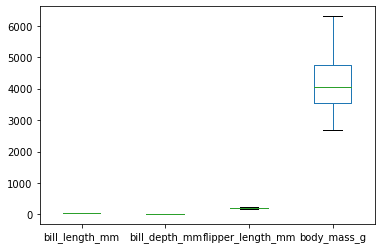

In [4]:
df.plot(kind='box')

The scales of our data don't align particularly well. So for the sake of plotting, we'll ignore the body mass of the penguins.

<AxesSubplot:>

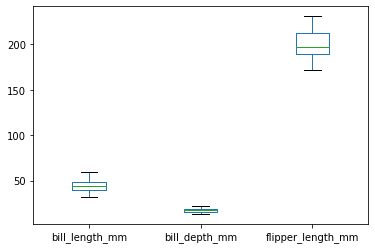

In [5]:
df.drop(["body_mass_g"], axis=1).plot(kind='box')
# axis=1 means we are dropping the column

#### Better presentation: figure size, add title and legend

<AxesSubplot:title={'center':'Box plot of different measurements of species of penguin'}>

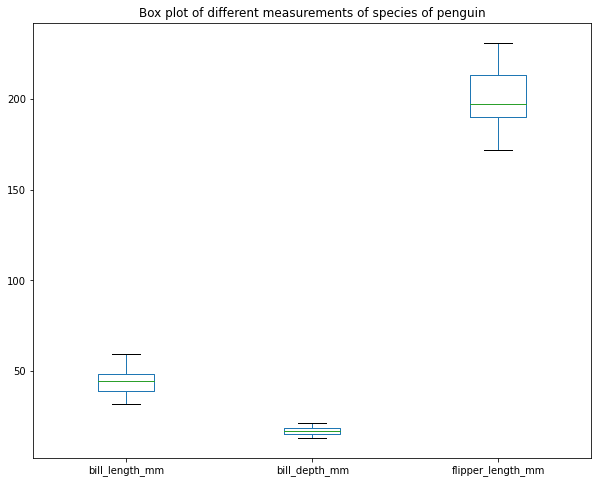

In [8]:
df.drop(["body_mass_g"], axis=1).plot(kind='box', figsize=(10,8), title='Box plot of different measurements of species of penguin', legend=True)
# add multiple attributes to the .plot

#### Making subplots

bill_length_mm          AxesSubplot(0.125,0.536818;0.352273x0.343182)
bill_depth_mm        AxesSubplot(0.547727,0.536818;0.352273x0.343182)
flipper_length_mm          AxesSubplot(0.125,0.125;0.352273x0.343182)
body_mass_g             AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

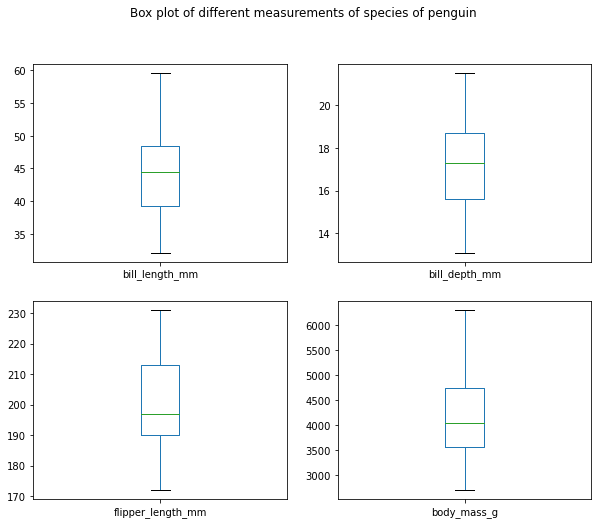

In [9]:
df.plot(kind='box',
        subplots=True, layout=(2,2),
        figsize=(10,8), title='Box plot of different measurements of species of penguin', legend=True)
# add subplots and layout attribute for creating subplots

---

<div class="alert alert-block alert-warning" style="padding: 0px; padding-left: 20px; padding-top: 5px;"><h2 style="color: #301E40">
Exercise: Compare bill length of different species of penguin
</h2><br>
</div>

Let's use box plot to compare the bill length of different species of penguin. We need the DataFrame to be slightly different so we can compare the different type species of penguin. We would like to pivot the data so each column are bill length of different species of penguin.

####  Prepare the data set

In [10]:
df_pivot = df.pivot(index=None, columns='species', values='bill_length_mm')
# tell the pivot() method to make the 'species' as columns, and using the 'bill_length_mm' as the value

In [11]:
df_pivot.sample(10)

species,Adelie,Chinstrap,Gentoo
277,NaN,NaN,45.5
273,NaN,NaN,50.1
115,42.7,NaN,NaN
249,NaN,NaN,50.0
144,37.3,NaN,NaN
113,42.2,NaN,NaN
69,41.8,NaN,NaN
77,37.2,NaN,NaN
310,NaN,NaN,47.5
2,40.3,NaN,NaN


#### Box plot of df_pivot

Now we can use `plot()` on `df_pivot`. To make a box plot, remember to set the parameter `kind` to 'box'. Also make the presentation nice by setting a good `figsize` and with a good `title`. Don't forget the `legend`.

<AxesSubplot:title={'center':'Box plot of bill lengths of different species of penguin'}>

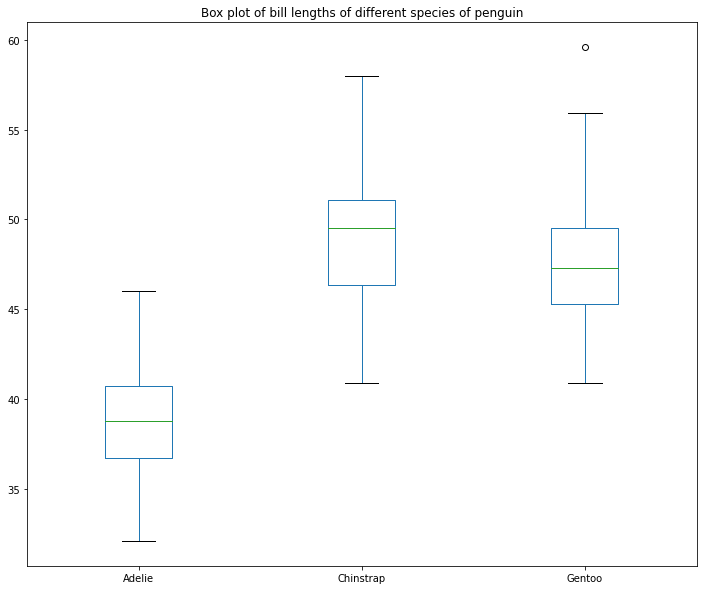

In [13]:
df_pivot.plot(kind='box', 
              figsize=(12,10), 
              title='Box plot of bill lengths of different species of penguin', 
              legend=True)

#### Additional exercise

Challenge yourself by making your own `df_pivot` pivoting on a different measure (e.g. Body Mass). Also try using a histogram (hist) instead of a boxplot. You can also try making a plot with 3 subplots, each is a histogram of a type of penguin.

In [14]:
df_pivot1 = df.pivot(index=None, columns='species', values='body_mass_g')

In [15]:
df_pivot1.sample(10)

species,Adelie,Chinstrap,Gentoo
251,NaN,NaN,4700.0
111,4600.0,NaN,NaN
15,3700.0,NaN,NaN
149,3750.0,NaN,NaN
208,NaN,3250.0,NaN
191,NaN,4500.0,NaN
212,NaN,3950.0,NaN
253,NaN,NaN,6050.0
85,3550.0,NaN,NaN
281,NaN,NaN,5300.0


<AxesSubplot:title={'center':'Histogram of body mass (g) of different species of penguins'}, ylabel='Frequency'>

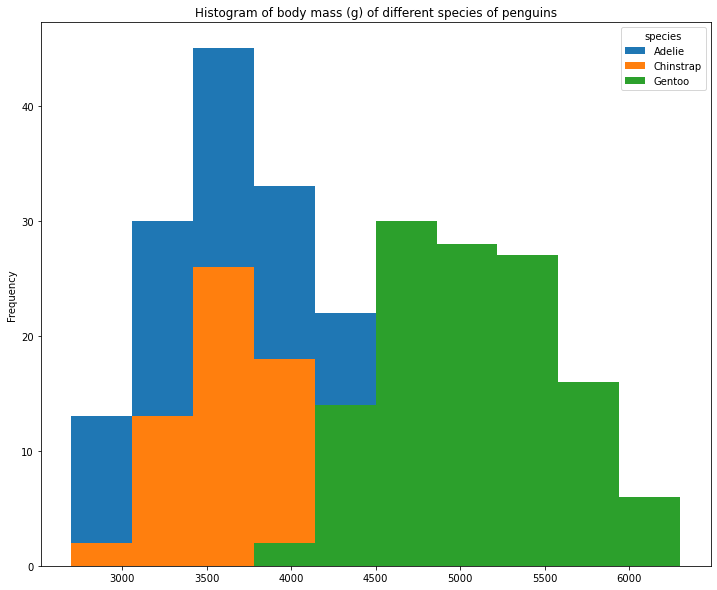

In [21]:
df_pivot1.plot(kind='hist', 
               figsize=(12,10), 
               title='Histogram of body mass (g) of different species of penguins', 
               legend=True)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

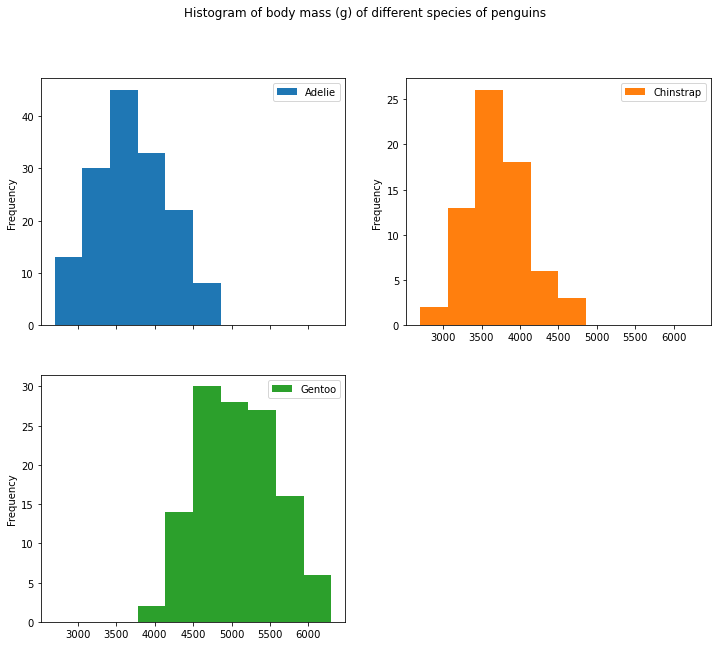

In [22]:
df_pivot1.plot(kind='hist', 
               subplots=True, 
               layout=(2,2),
               figsize=(12,10), 
               title='Histogram of body mass (g) of different species of penguins', 
               legend=True)

So far we are not using `matplotlib.pyplot` directly. Although it is very convenient to use `df.plot()`, sometimes we would like to have more control with what we are plotting and make more complex graphs. In the following sections, we will use `matplotlib.pyplot` (which is imported as `plt` now) directly.

### Divide the data into 3 types accordingly

In [23]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [24]:
df_adelie = df[df['species'] == 'Adelie']

In [25]:
df_chinstrap = df[df['species'] == 'Chinstrap']

In [26]:
df_gentoo = df[df['species'] == 'Gentoo']

### Scatter plot example: plot on Bill Length and Width

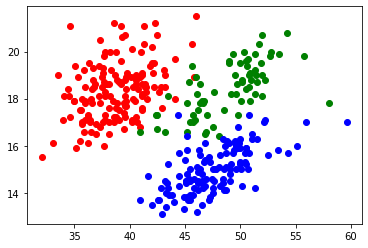

In [27]:
plt.scatter(df_adelie['bill_length_mm'], df_adelie['bill_depth_mm'], c='r')
plt.scatter(df_chinstrap['bill_length_mm'], df_chinstrap['bill_depth_mm'], c='g')
plt.scatter(df_gentoo['bill_length_mm'], df_gentoo['bill_depth_mm'], c='b')

#### Better presentation: figure size, add labels and legend

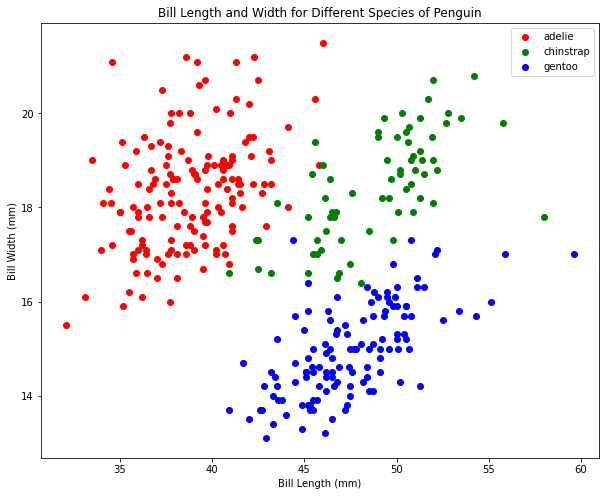

In [45]:
plt.figure(figsize=(10,8)) # set the size of the plot

plt.scatter(df_adelie['bill_length_mm'], df_adelie['bill_depth_mm'], c='r')
plt.scatter(df_chinstrap['bill_length_mm'], df_chinstrap['bill_depth_mm'], c='g')
plt.scatter(df_gentoo['bill_length_mm'], df_gentoo['bill_depth_mm'], c='b')

ax = plt.gca() #gca method tell the rest of the code to reference the plot we made

ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Width (mm)')
ax.set_title('Bill Length and Width for Different Species of Penguin')

ax.legend(('adelie', 'chinstrap', 'gentoo'))

### Scatter plot exercise: plot on Flipper Length and Width

Now is your turn to make your own plot. Make sure you have also set the labels and legend

In [30]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [31]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

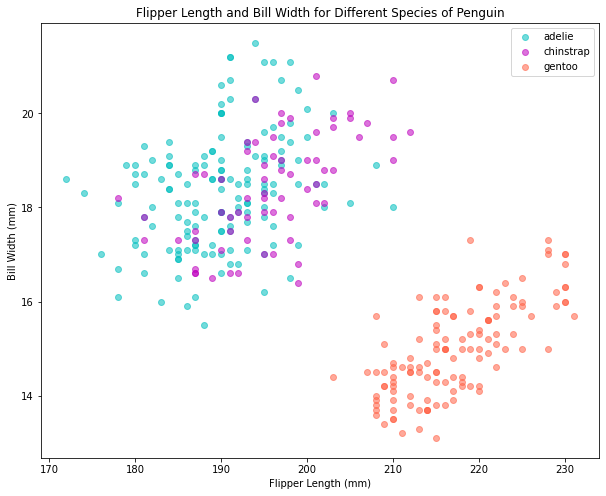

In [51]:
plt.figure(figsize=(10,8))

plt.scatter(df_adelie['flipper_length_mm'], df_adelie['bill_depth_mm'], c='c', alpha=.55)
plt.scatter(df_chinstrap['flipper_length_mm'], df_chinstrap['bill_depth_mm'], c='m', alpha=.55)
plt.scatter(df_gentoo['flipper_length_mm'], df_gentoo['bill_depth_mm'], c='tomato', alpha=.55)

ax=plt.gca()

ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Bill Width (mm)')
ax.set_title('Flipper Length and Bill Width for Different Species of Penguin')

ax.legend(('adelie', 'chinstrap', 'gentoo'))

### Histogram example: plot on Bill Length

In [ ]:
plt.figure(figsize=(10,8))

plt.hist(df_adelie['bill_length_mm'], color='r', alpha=.5) # alpha set the transparency of the plot
plt.hist(df_chinstrap['bill_length_mm'], color='g', alpha=.5)
plt.hist(df_gentoo['bill_length_mm'], color='b', alpha=.5)

ax = plt.gca()

ax.set_xlabel('Bill Length (mm)')
ax.set_title('Histogram of Bill Length for Different Species of Penguin')

ax.legend(('adelie', 'chinstrap', 'gentoo'))

### Histogram exercise: plot on Body Mass

Now is your turn to make your own plot. Make sure you set the alpha to a proper value and have the right the labels and legend.

### Making subplots example

To make subplots with just `plt` is a bit more complicated. It is considered more advance and require some understanding of what the building blocks are in a plot. Don't feel bad if you find it challenging, you can always follow the example and try it yourself to understand more what is going on.

The example below plot the histogram of Bill Length and Bill Width side by side

In [ ]:
# First, we have to decide how many subplots we want and how they are orientated
# say we want them side by side (i.e. 1 row 2 columns)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

# this will create a figure object (which is the whole plot area)
# and 2 axes (which are the 2 subplots labeled ax0 and ax1)

# Now we can put plots in them accordingly

### for ax0 ###

ax0.hist(df_adelie['bill_length_mm'], color='r', alpha=.5) 
ax0.hist(df_chinstrap['bill_length_mm'], color='g', alpha=.5)
ax0.hist(df_gentoo['bill_length_mm'], color='b', alpha=.5)

ax0.set_xlabel('Bill Length (mm)')
ax0.set_title('Histogram of Bill Length for Different Species of Penguin')

ax0.legend(('adelie', 'chinstrap', 'gentoo'))

### for ax1 ###

ax1.hist(df_adelie['bill_depth_mm'], color='r', alpha=.5) 
ax1.hist(df_chinstrap['bill_depth_mm'], color='g', alpha=.5)
ax1.hist(df_gentoo['bill_depth_mm'], color='b', alpha=.5)

ax1.set_xlabel('Bill Width (mm)')
ax1.set_title('Histogram of Bill Width for Different Species of Penguin')

ax1.legend(('adelie', 'chinstrap', 'gentoo'))

plt.show() # after building what we want for both axes, use show() method to show plots

---

<div class="alert alert-block alert-warning" style="padding: 0px; padding-left: 20px; padding-top: 5px;"><h2 style="color: #301E40">
Making subplots exercise
</h2><br>
</div>

Make 2 subplots, one on top of another. They are scatter plots of Flipper Length and Body Mass (with different type of penguin). After you have done it, try also other orientation and plots. See if you can make 4 subplots together. Always make sure the presentation is good.

---

<div class="alert alert-block alert-warning" style="padding: 0px; padding-left: 20px; padding-top: 5px;"><h2 style="color: #301E40">
More matplotlib!
</h2><br>
</div>

Check out more example of histogram with multiple data sets: https://matplotlib.org/gallery/statistics/histogram_multihist.html#sphx-glr-gallery-statistics-histogram-multihist-py

Example: Creates histogram from scatter plot and adds them to the sides of the plot
https://matplotlib.org/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py

There are a lot more to learn about matplotlib. It is a very powerful library. You can always learn more by looking at the examples at: https://matplotlib.org/gallery/index.html

Also, if you are stuck, always check the documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

![](https://media0.giphy.com/media/l3nF8lOW9D0ZElDvG/200.gif)